In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

from tqdm import tqdm
import glob
import seaborn as sns
import cv2
import io

import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
import ipywidgets as widgets
from tensorflow.keras.utils import to_categorical

# architecture Pare
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D

from sklearn.metrics import classification_report, confusion_matrix

In [2]:
labels = ["broadleaf", "grass", "soil", "soybean"]

In [3]:
X  =[] 
Y = [] 
image_size = (227, 227)

for i in labels:
    Datasetspath = "../input/weed-detection-in-soybean-crops/dataset/" + i + "/"
    print(Datasetspath)
    fileRead = glob.glob(Datasetspath + "*")
    print(len(fileRead))
    
    for file in fileRead:
        image = cv2.imread(file)
        img = cv2.resize(image, image_size)
        X.append(img)
        Y.append(i)
X = np.array(X)
Y = np.array(Y)

../input/weed-detection-in-soybean-crops/dataset/broadleaf/
1191
../input/weed-detection-in-soybean-crops/dataset/grass/
3520
../input/weed-detection-in-soybean-crops/dataset/soil/
3249
../input/weed-detection-in-soybean-crops/dataset/soybean/
7376


In [4]:
for i in labels:
    Datasetspath = "../input/weed-detection-in-soybean-crops/dataset/" + i + "/"
    print(Datasetspath)
    fileRead = glob.glob(Datasetspath + "*")
    print(fileRead[1])
#     break

../input/weed-detection-in-soybean-crops/dataset/broadleaf/
../input/weed-detection-in-soybean-crops/dataset/broadleaf/274.tif
../input/weed-detection-in-soybean-crops/dataset/grass/
../input/weed-detection-in-soybean-crops/dataset/grass/659.tif
../input/weed-detection-in-soybean-crops/dataset/soil/
../input/weed-detection-in-soybean-crops/dataset/soil/659.tif
../input/weed-detection-in-soybean-crops/dataset/soybean/
../input/weed-detection-in-soybean-crops/dataset/soybean/5623.tif


In [5]:
X.shape, Y.shape

((15336, 227, 227, 3), (15336,))

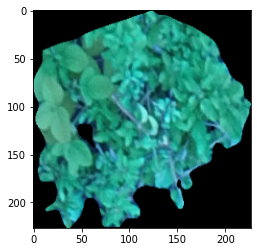

In [6]:
plt.imshow(X[0])

In [7]:
print(Y[0])

broadleaf


In [8]:
Temp_y = []
for i in Y:
    Temp_y.append(labels.index(i))
Y = to_categorical(Temp_y)
Y[0]

array([1., 0., 0., 0.], dtype=float32)

In [9]:
Y.shape

(15336, 4)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=101)

In [11]:
X_train.shape, Y_train.shape

((10735, 227, 227, 3), (10735, 4))

In [12]:
X_test.shape, Y_test.shape

((4601, 227, 227, 3), (4601, 4))

In [13]:
import tensorflow as tf
from tensorflow.keras.layers import MaxPooling2D, Dense, Conv2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout

In [14]:
models = Sequential()


#1st Conv2D Layer
models.add(Conv2D(96, kernel_size = (11, 11), strides = (4, 4), 
                 padding = "valid", activation  = 'relu', input_shape = (227, 227, 3)))
models.add(MaxPooling2D(pool_size = (3, 3),
                       strides = (2, 2), padding = "valid",
                       data_format = None))



#2nd Conv2D Layer

models.add(Conv2D(256, kernel_size = (5, 5), strides = 1, 
                 padding = "same", activation  = 'relu'))

models.add(MaxPooling2D(pool_size = (3, 3),
                       strides = (2, 2), padding = "valid",#"same"
                       data_format = None))




#3rd Conv2D Layer
models.add(Conv2D(384, kernel_size = (3, 3), strides = 1, 
                 padding = "same", activation  = 'relu'))



#4th Conv2D Layer
models.add(Conv2D(384, kernel_size = (3, 3), strides = 1, 
                 padding = "same", activation  = 'relu'))


#5th Conv2D Layer

models.add(Conv2D(256, kernel_size = (3, 3), strides = 1, 
                 padding = "same", activation  = 'relu'))

models.add(MaxPooling2D(pool_size = (3, 3),
                       strides = (2, 2), padding = "valid",#"same"
                       data_format = None))


# Flatten Layer
models.add(Flatten())

models.add(Dense(4096, activation = 'relu'))
models.add(Dense(4096, activation = 'relu'))
#models.add(Dense(1000, activation = 'relu'))
models.add(Dense(4, activation = 'softmax'))


In [15]:
models.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 256)       8

In [16]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [17]:
models.compile(loss = "categorical_crossentropy",
             optimizer = optimizer,
             metrics = ["accuracy"])

In [18]:
history = models.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 10, batch_size = 2, verbose = 1)

Epoch 1/10
5368/5368 [==============================] - 77s 13ms/step - loss: 0.8290 - accuracy: 0.6905 - val_loss: 0.5271 - val_accuracy: 0.8566
Epoch 2/10
5368/5368 [==============================] - 68s 13ms/step - loss: 0.5784 - accuracy: 0.7835 - val_loss: 2.4559 - val_accuracy: 0.7053
Epoch 3/10
5368/5368 [==============================] - 68s 13ms/step - loss: 0.3667 - accuracy: 0.8671 - val_loss: 0.4321 - val_accuracy: 0.8563
Epoch 4/10
5368/5368 [==============================] - 68s 13ms/step - loss: 0.3171 - accuracy: 0.8896 - val_loss: 0.4257 - val_accuracy: 0.8535
Epoch 5/10
5368/5368 [==============================] - 68s 13ms/step - loss: 0.2890 - accuracy: 0.8966 - val_loss: 0.2451 - val_accuracy: 0.9076
Epoch 6/10
5368/5368 [==============================] - 68s 13ms/step - loss: 0.2341 - accuracy: 0.9147 - val_loss: 0.2283 - val_accuracy: 0.9189
Epoch 7/10
5368/5368 [==============================] - 68s 13ms/step - loss: 0.3272 - accuracy: 0.8950 - val_loss: 0.3034 -

Model Accuracy



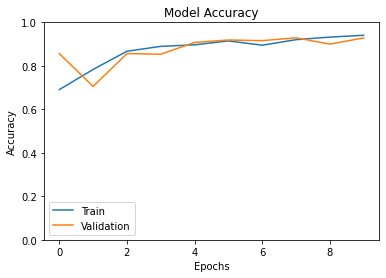

In [19]:
ax = plt.gca()
ax.set_ylim([0, 1])
print("Model Accuracy\n")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

Model Loss



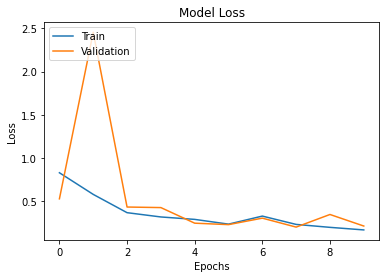

In [20]:
ax = plt.gca()
# ax.set_ylim([0, 1])
print("Model Loss\n")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()